In [7]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")
clf = LinearRegression()
# clf = AdaBoostRegressor(learning_rate=0.1)
file_name = 'model_data_for_trump'
data = pd.read_csv(file_name+'.csv')
data.set_index('Day',inplace=True)
rolling_num = 7
# for i in range(rolling_num,1486):
#      data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,4].mean()   
data.drop(['Year','Month'],inplace=True,axis=1)
data

,C,I,G,NX,American_GDP,GDP
Day,,,,,,
2015/1/5,-464.579858,4.511981e+08,16203.00000,601.000000,2.680000e+11,2.640000e+11
2015/1/6,-469.069098,4.209622e+08,16203.00000,601.000000,2.650000e+11,2.710000e+11
2015/1/7,-473.931087,3.201912e+08,16203.00000,601.000000,2.680000e+11,2.720000e+11
2015/1/8,-474.982208,2.950030e+08,16203.00000,601.000000,2.670000e+11,2.650000e+11
2015/1/9,-476.512447,3.499827e+08,16203.00000,601.000000,2.650000e+11,2.640000e+11
...,...,...,...,...,...,...
2021/11/24,676.613692,8.927819e+07,18078.50588,108.552066,3.050000e+11,NaN
2021/11/25,631.376983,9.355585e+07,19834.58512,105.812135,3.050000e+11,NaN
2021/11/26,668.026725,9.435478e+07,19312.19628,120.393393,3.050000e+11,NaN


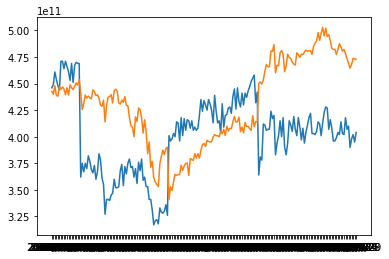

mse: 3.2295909759982717e+21


0.1317375641098129

In [69]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
train = data[:1200]
test = data[1200:1401]
x_train , x_test = train.drop('GDP',axis =1 ) , test.drop('GDP', axis = 1 )
y_train , y_test = train['GDP'] , test['GDP']
# x_train , x_test , y_train , y_test = train_test_split(data.drop('GDP',axis=1),data['GDP'],test_size = 0.2)
model = clf.fit(x_train, y_train)
model.score(x_test , y_test)
pred = model.predict(x_test)
plt.plot(y_test)
plt.plot(pred)
plt.show()
mse_test=mean_squared_error(y_test,pred)
print('mse:',mse_test)
bias = abs((pred - y_test)/y_test)
bias = sum(bias)/len(bias)
bias
# print('bias:',bias)

In [2]:
def regression(num):
    """fit model"""
    train = data[rolling_num:num]
    x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
    y_train = pd.DataFrame(train[train.columns[-1]])
    test = data[num:num+1]
    x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
    model = clf.fit(x_train, y_train)
    pred_value = model.predict(x_test)
    return pred_value 

In [3]:
import random
for i in range(1402,len(data)): #  408 count
    print(i-1402)
    pred = regression(i)
    print('predict:',pred)
    data.iloc[i:i+1,-1] = pred 
#     if data.iloc[i:i+1,-1].values > 347000000000:
#         data.iloc[i:i+1,-1] = data.iloc[i:i+1,-1] *  (1-random.random()*0.25)
#     if data.iloc[i:i+1,-1].values < 262000000000:
#         data.iloc[i:i+1,-1] = data.iloc[i:i+1,-1] * (1+random.random()*0.25)

0


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
data.to_csv(file_name+'_result.csv')

In [ ]:
score_list = pd.DataFrame(score_list)
score_list.to.csv(file_name + '_result_score.csv')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(data['GDP'])
plt.xticks(data.index[::300],data.index[::300])
plt.legend()
plt.show()